In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [4]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [7]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

623

In [9]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [10]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [11]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [12]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | farafangana
Processing Record 2 of Set 1 | hobart
Processing Record 3 of Set 1 | mataura
Processing Record 4 of Set 1 | severodvinsk
Processing Record 5 of Set 1 | tevriz
Processing Record 6 of Set 1 | port alfred
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | tsumeb
Processing Record 9 of Set 1 | lorengau
Processing Record 10 of Set 1 | jamestown
Processing Record 11 of Set 1 | saldanha
Processing Record 12 of Set 1 | coquimbo
Processing Record 13 of Set 1 | vaini
Processing Record 14 of Set 1 | busselton
Processing Record 15 of Set 1 | hermanus
Processing Record 16 of Set 1 | kerrville
Processing Record 17 of Set 1 | narsaq
Processing Record 18 of Set 1 | bengkulu
Processing Record 19 of Set 1 | pingliang
Processing Record 20 of Set 1 | lompoc
Processing Record 21 of Set 1 | cape town
Processing Record 22 of Set 1 | saskylakh
Processing Record 23 of Set 1 | khatanga


Processing Record 40 of Set 4 | qujing
Processing Record 41 of Set 4 | roald
Processing Record 42 of Set 4 | qasigiannguit
Processing Record 43 of Set 4 | tabas
Processing Record 44 of Set 4 | kungurtug
Processing Record 45 of Set 4 | sabha
Processing Record 46 of Set 4 | turukhansk
Processing Record 47 of Set 4 | tuatapere
Processing Record 48 of Set 4 | college
Processing Record 49 of Set 4 | langxiang
Processing Record 50 of Set 4 | provideniya
Processing Record 1 of Set 5 | hillsborough
Processing Record 2 of Set 5 | konya
Processing Record 3 of Set 5 | tual
Processing Record 4 of Set 5 | villa carlos paz
Processing Record 5 of Set 5 | rocha
Processing Record 6 of Set 5 | niamey
Processing Record 7 of Set 5 | ambilobe
Processing Record 8 of Set 5 | nizhniy odes
Processing Record 9 of Set 5 | kalmunai
Processing Record 10 of Set 5 | shimoda
Processing Record 11 of Set 5 | isangel
Processing Record 12 of Set 5 | shebalino
Processing Record 13 of Set 5 | tarko-sale
Processing Record 1

Processing Record 30 of Set 8 | greencastle
Processing Record 31 of Set 8 | pundaguitan
Processing Record 32 of Set 8 | canton
Processing Record 33 of Set 8 | fort saint john
City not found. Skipping...
Processing Record 34 of Set 8 | namibe
Processing Record 35 of Set 8 | mount gambier
Processing Record 36 of Set 8 | mayo
Processing Record 37 of Set 8 | barra
Processing Record 38 of Set 8 | kapoeta
Processing Record 39 of Set 8 | amiens
Processing Record 40 of Set 8 | bethel
Processing Record 41 of Set 8 | kavieng
Processing Record 42 of Set 8 | erdenet
Processing Record 43 of Set 8 | ust-kuyga
Processing Record 44 of Set 8 | les cayes
Processing Record 45 of Set 8 | chicama
Processing Record 46 of Set 8 | cockburn harbour
City not found. Skipping...
Processing Record 47 of Set 8 | havoysund
Processing Record 48 of Set 8 | harper
Processing Record 49 of Set 8 | goderich
Processing Record 50 of Set 8 | rajauri
Processing Record 1 of Set 9 | kendari
Processing Record 2 of Set 9 | chapai

Processing Record 20 of Set 12 | san quintin
Processing Record 21 of Set 12 | demirci
Processing Record 22 of Set 12 | salalah
Processing Record 23 of Set 12 | coos bay
Processing Record 24 of Set 12 | krasnodon
Processing Record 25 of Set 12 | carsamba
Processing Record 26 of Set 12 | tymovskoye
Processing Record 27 of Set 12 | louis trichardt
Processing Record 28 of Set 12 | turtas
Processing Record 29 of Set 12 | jabinyanah
Processing Record 30 of Set 12 | carutapera
Processing Record 31 of Set 12 | kedrovyy
Processing Record 32 of Set 12 | tokur
Processing Record 33 of Set 12 | sobolevo
Processing Record 34 of Set 12 | port augusta
Processing Record 35 of Set 12 | ust-kalmanka
Processing Record 36 of Set 12 | wulanhaote
City not found. Skipping...
Processing Record 37 of Set 12 | liverpool
Processing Record 38 of Set 12 | moses lake
Processing Record 39 of Set 12 | grafton
Processing Record 40 of Set 12 | seymchan
Processing Record 41 of Set 12 | mangrol
Processing Record 42 of Set

In [18]:
len(city_data)

578

In [19]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Farafangana,-22.8167,47.8333,80.85,80,14,14.76,MG,2021-10-24 11:35:57
1,Hobart,-42.8794,147.3294,48.06,83,75,1.99,AU,2021-10-24 11:35:58
2,Mataura,-46.1927,168.8643,51.82,91,100,0.27,NZ,2021-10-24 11:35:58
3,Severodvinsk,64.5635,39.8302,35.71,73,81,13.98,RU,2021-10-24 11:35:58
4,Tevriz,57.5090,72.4042,43.99,77,88,6.06,RU,2021-10-24 11:35:58
5,Port Alfred,-33.5906,26.8910,63.79,62,86,10.87,ZA,2021-10-24 11:35:59
6,Punta Arenas,-53.1500,-70.9167,37.51,87,90,17.27,CL,2021-10-24 11:35:59
7,Tsumeb,-19.2333,17.7167,89.15,9,17,10.58,NA,2021-10-24 11:35:59
8,Lorengau,-2.0226,147.2712,82.17,76,96,7.36,PG,2021-10-24 11:36:00
9,Jamestown,42.0970,-79.2353,45.99,99,90,3.00,US,2021-10-24 11:36:00


In [15]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Farafangana,MG,2021-10-24 11:35:57,-22.8167,47.8333,80.85,80,14,14.76
1,Hobart,AU,2021-10-24 11:35:58,-42.8794,147.3294,48.06,83,75,1.99
2,Mataura,NZ,2021-10-24 11:35:58,-46.1927,168.8643,51.82,91,100,0.27
3,Severodvinsk,RU,2021-10-24 11:35:58,64.5635,39.8302,35.71,73,81,13.98
4,Tevriz,RU,2021-10-24 11:35:58,57.5090,72.4042,43.99,77,88,6.06
5,Port Alfred,ZA,2021-10-24 11:35:59,-33.5906,26.8910,63.79,62,86,10.87
6,Punta Arenas,CL,2021-10-24 11:35:59,-53.1500,-70.9167,37.51,87,90,17.27
7,Tsumeb,NA,2021-10-24 11:35:59,-19.2333,17.7167,89.15,9,17,10.58
8,Lorengau,PG,2021-10-24 11:36:00,-2.0226,147.2712,82.17,76,96,7.36
9,Jamestown,US,2021-10-24 11:36:00,42.0970,-79.2353,45.99,99,90,3.00


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [20]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

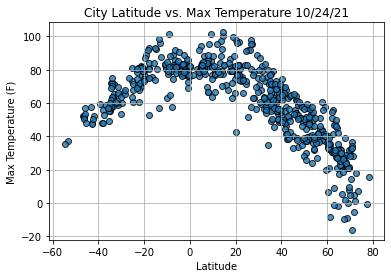

In [21]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

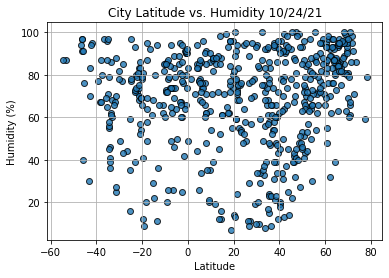

In [22]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

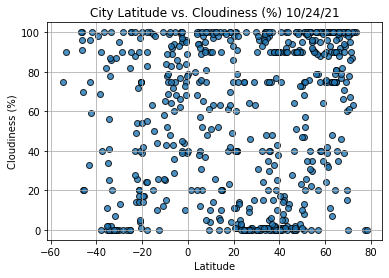

In [23]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

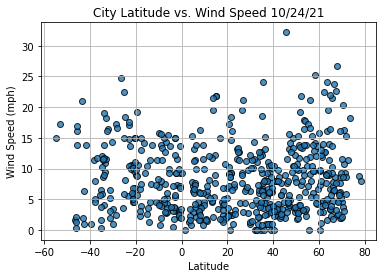

In [24]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()